In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# Set plot style
sns.set(style="whitegrid", palette="Set2")

In [41]:
x, y = make_classification(
    n_samples=500,        # Total 500 rows of data
    n_features=5,         # Each row has 5 features (X1 ... X5)
    n_informative=3,      # Out of 5 features, 3 are actually useful for prediction
    n_redundant=0,        # No duplicate or derived features
    n_classes=3,          #  There are 3 output classes (our target variable can be 0, 1, or 2)
    random_state=42
)

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [43]:
clf_default = DecisionTreeClassifier(random_state=42)
clf_default.fit(x_train,y_train)

y_pred_default = clf_default.predict(x_test)
print("Default Decision Tree accuracy without pruning :", accuracy_score(y_test,y_pred_default))

Default Decision Tree accuracy without pruning : 0.83


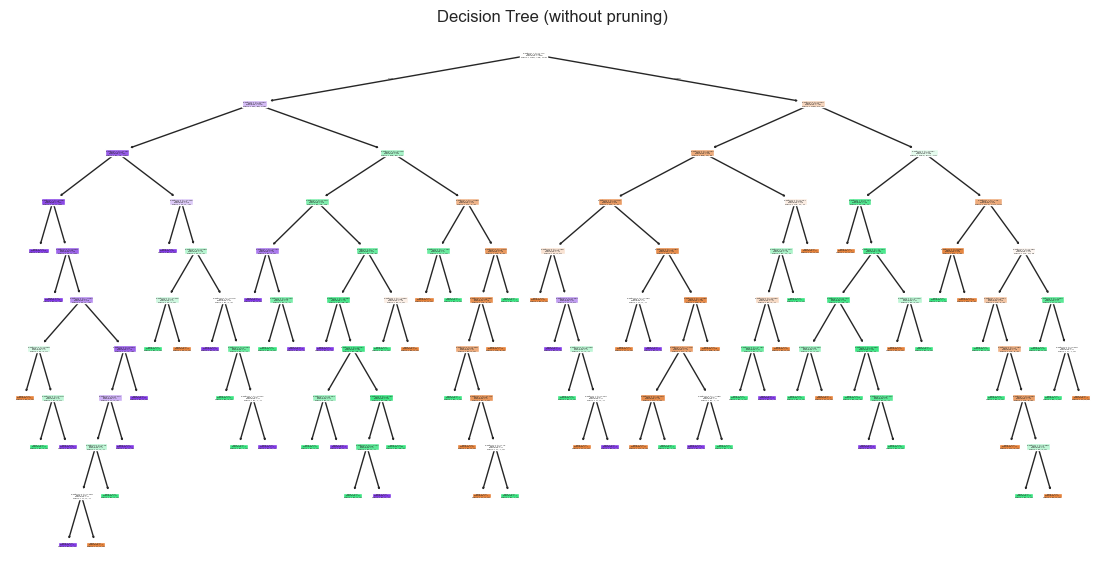

In [44]:
plt.figure(figsize=(14,7))
plot_tree(clf_default, filled=True, feature_names=[f"Feature {i}" for i in range(x.shape[1])])
plt.title("Decision Tree (without pruning)")
plt.show()

In [45]:
clf_pruned = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_pruned.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [46]:
print("Accuracy with pruning (max_depth=3):", accuracy_score(y_test, y_pred_pruned))

Accuracy with pruning (max_depth=3): 0.76


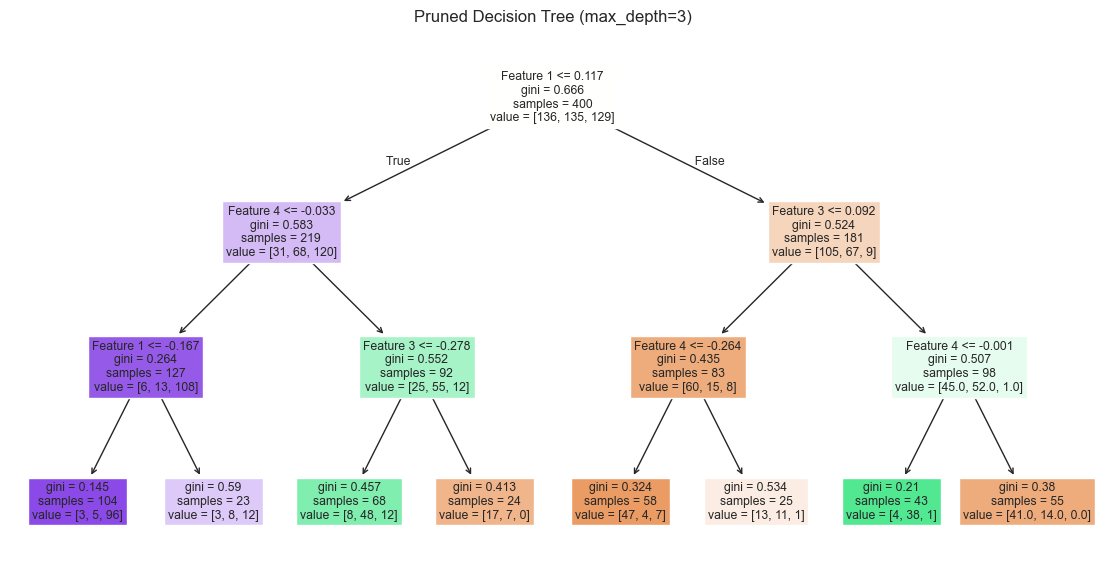

In [48]:
# Visualize the pruned Decision Tree
plt.figure(figsize=(14,7))
plot_tree(clf_pruned, filled=True, feature_names=[f"Feature {i}" for i in range(x.shape[1])])
plt.title("Pruned Decision Tree (max_depth=3)")
plt.show()